In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Path to your CSV output file
file_path = "bel_similarity_output.csv"

df = pd.read_csv(file_path)
df.head()

,index,evidence,llm_statement,indra_statement,similarity_rating,match_type,similarity_rating_reason
0,3,"Phosphorylation at S326 is mediated by AKT1, m...","act(p(HGNC:AKT1), ma(GO:""kinase activity"")) di...",p(HGNC:391 ! AKT1) directlyIncreases p(HGNC:52...,none_comparable,not_compared,A different INDRA statement was selected as th...
1,3,"Phosphorylation at S326 is mediated by AKT1, m...","act(p(HGNC:AKT1), ma(GO:""kinase activity"")) di...",p(HGNC:391 ! AKT1) directlyIncreases p(HGNC:52...,good,most_similar,Candidate 1 matches the query statement exactl...
2,3,"Phosphorylation at S326 is mediated by AKT1, m...","act(p(HGNC:AKT1), ma(GO:""kinase activity"")) di...",p(HGNC:391 ! AKT1) directlyIncreases p(HGNC:52...,none_comparable,not_compared,A different INDRA statement was selected as th...
3,3,"Phosphorylation at S326 is mediated by AKT1, m...","act(p(HGNC:AKT1), ma(GO:""kinase activity"")) di...",p(HGNC:391 ! AKT1) directlyIncreases p(HGNC:52...,none_comparable,not_compared,A different INDRA statement was selected as th...
4,3,"Phosphorylation at S326 is mediated by AKT1, m...","act(p(HGNC:AKT1), ma(GO:""kinase activity"")) di...",p(HGNC:392 ! AKT2) directlyIncreases p(HGNC:52...,none_comparable,not_compared,A different INDRA statement was selected as th...


In [3]:
print("Columns:", df.columns.tolist())

Columns: ['index', 'evidence', 'llm_statement', 'indra_statement', 'similarity_rating', 'match_type', 'similarity_rating_reason']


In [4]:
rating_counts = df["similarity_rating"].value_counts().rename_axis("rating").reset_index(name="count")
rating_counts["percentage"] = (rating_counts["count"] / len(df) * 100).round(2)
rating_counts

,rating,count,percentage
0,none_comparable,91,83.49
1,good,13,11.93
2,partial,5,4.59


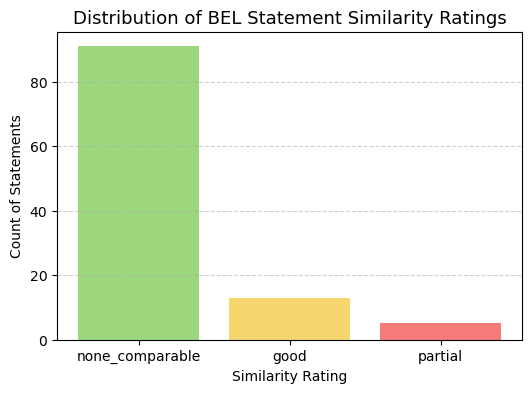

In [5]:
plt.figure(figsize=(6,4))
plt.bar(rating_counts["rating"], rating_counts["count"], color=["#9cd67d", "#f5d76e", "#f57b7b", "#dcdcdc"])
plt.title("Distribution of BEL Statement Similarity Ratings", fontsize=13)
plt.ylabel("Count of Statements")
plt.xlabel("Similarity Rating")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

In [26]:
# --- Per-evidence breakdown (with original evidence index) ---
evidence_summary = (
    df.groupby(["index", "evidence", "similarity_rating"])
      .size()
      .unstack(fill_value=0)
      .reset_index()
)

# Clean up any residual column names
evidence_summary.columns.name = None

# Compute totals and comparable percentages
evidence_summary["total_comparisons"] = evidence_summary.select_dtypes("number").sum(axis=1)
evidence_summary["comparable_count"] = (
    evidence_summary.get("good", 0)
    + evidence_summary.get("partial", 0)
    + evidence_summary.get("low", 0)
)
evidence_summary["comparable_pct"] = (
    evidence_summary["comparable_count"] / evidence_summary["total_comparisons"] * 100
).round(1)

display(evidence_summary)


,index,evidence,good,none_comparable,partial,total_comparisons,comparable_count,comparable_pct
0,3,AKT2 also phosphorylated S326 of HSF1 but show...,1,4,0,8,1,12.5
1,3,Mass spectrometry showed that AKT1 also phosph...,3,12,0,18,3,16.7
2,3,"Phosphorylation at S326 is mediated by AKT1, m...",1,4,0,8,1,12.5
3,3,"Similarly, mTOR, p38, MEK1 and DYRK2 all phosp...",0,12,3,18,3,16.7
4,4,AKT2 promoted a significant increase in HSF1 a...,1,1,0,6,1,16.7
5,4,Both AKT1 and AKT2 phosphorylated S326 of HSF1...,2,2,0,8,2,25.0
6,4,"Consistent with our previous findings, AKT1 st...",1,1,0,6,1,16.7
7,4,We previously identified AKT1 as an upstream r...,1,1,0,6,1,16.7
8,5,AKT1 is also a well-known activator of mTOR an...,0,2,0,7,0,0.0
9,5,These results seem contradictory because AKT2 ...,0,1,1,7,1,14.3


In [ ]:
mostly_none = evidence_summary[evidence_summary["comparable_pct"] < 10]
mostly_none

,index,evidence,good,none_comparable,partial,total_comparisons,comparable_count,comparable_pct
8,5,AKT1 is also a well-known activator of mTOR an...,0,2,0,7,0,0.0
10,6,Introduction of AKT1 was observed to promote a...,0,6,0,12,0,0.0
11,6,"Similarly, introduction of AKT1 promoted a sig...",0,6,0,12,0,0.0
13,11,Kinases DYRK1A and DYRK3 have been shown to ph...,0,2,0,13,0,0.0
14,11,"Sumoylation at K734 by SUMO1 increases, wherea...",0,2,0,13,0,0.0
15,13,"Interestingly, previous experiments demonstrat...",1,1,0,15,1,6.7
16,13,NF-kappaB signaling exerts anti-apoptotic and ...,0,4,0,17,0,0.0
17,14,Biological functions of TNF and subsequent act...,0,2,0,16,0,0.0
18,15,A20 suppresses apoptotic JNK signaling in a TN...,0,2,0,17,0,0.0
19,15,ASK1 can phosphorylate JNK and the physical in...,1,1,0,17,1,5.9


In [29]:
for _, row in rating_counts.iterrows():
    print(f"{row['rating']}: {row['count']} statements ({row['percentage']}%)")

none_comparable: 91 statements (83.49%)
good: 13 statements (11.93%)
partial: 5 statements (4.59%)


In [8]:
rating_to_inspect = "good"  # change to "partial", "none_comparable", etc.
examples = df[df["similarity_rating"] == rating_to_inspect][["evidence", "llm_statement", "indra_statement", "similarity_rating_reason"]]
examples

,evidence,llm_statement,indra_statement,similarity_rating_reason
1,"Phosphorylation at S326 is mediated by AKT1, m...","act(p(HGNC:AKT1), ma(GO:""kinase activity"")) di...",p(HGNC:391 ! AKT1) directlyIncreases p(HGNC:52...,Candidate 1 matches the query statement exactl...
9,AKT2 also phosphorylated S326 of HSF1 but show...,"act(p(HGNC:AKT2), ma(GO:""kinase activity"")) di...",p(HGNC:392 ! AKT2) directlyIncreases p(HGNC:52...,Candidate 4 matches the query statement well a...
27,Mass spectrometry showed that AKT1 also phosph...,"act(p(HGNC:AKT1), ma(GO:""kinase activity"")) di...",p(HGNC:391 ! AKT1) directlyIncreases p(HGNC:52...,Candidate 2 matches the query statement with t...
33,Mass spectrometry showed that AKT1 also phosph...,"act(p(HGNC:AKT1), ma(GO:""kinase activity"")) di...",p(HGNC:391 ! AKT1) directlyIncreases p(HGNC:52...,Candidate 3 matches the query statement exactl...
35,Mass spectrometry showed that AKT1 also phosph...,"act(p(HGNC:AKT1), ma(GO:""kinase activity"")) di...",p(HGNC:391 ! AKT1) directlyIncreases p(HGNC:52...,Candidate 0 matches the query in terms of the ...
41,We previously identified AKT1 as an upstream r...,"act(p(HGNC:AKT1), ma(GO:""kinase activity"")) di...",p(HGNC:391 ! AKT1) directlyIncreases p(HGNC:52...,Candidate 1 matches the query statement closel...
43,"Consistent with our previous findings, AKT1 st...",act(p(HGNC:AKT1)) directlyIncreases act(p(HGNC...,p(HGNC:391 ! AKT1) directlyIncreases p(HGNC:52...,The candidate statement 1 matches the query st...
44,AKT2 promoted a significant increase in HSF1 a...,act(p(HGNC:AKT2)) increases act(p(HGNC:HSF1)),p(HGNC:392 ! AKT2) directlyIncreases p(HGNC:52...,Candidate 0 is semantically similar to the que...
47,Both AKT1 and AKT2 phosphorylated S326 of HSF1...,"act(p(HGNC:AKT1), ma(GO:""kinase activity"")) di...",p(HGNC:391 ! AKT1) directlyIncreases p(HGNC:52...,Candidate 1 matches the query statement closel...
48,Both AKT1 and AKT2 phosphorylated S326 of HSF1...,"act(p(HGNC:AKT2), ma(GO:""kinase activity"")) di...",p(HGNC:392 ! AKT2) directlyIncreases p(HGNC:52...,Candidate 0 matches the query well as it invol...


In [9]:
rating_to_inspect = "partial"  # change to "partial", "none_comparable", etc.
examples = df[df["similarity_rating"] == rating_to_inspect][["evidence", "llm_statement", "indra_statement", "similarity_rating_reason"]]
examples

,evidence,llm_statement,indra_statement,similarity_rating_reason
11,"Similarly, mTOR, p38, MEK1 and DYRK2 all phosp...","act(p(HGNC:MTOR), ma(GO:""kinase activity"")) di...",p(HGNC:391 ! AKT1) directlyIncreases p(HGNC:52...,Candidate 1 matches the phosphorylation site (...
16,"Similarly, mTOR, p38, MEK1 and DYRK2 all phosp...","act(p(HGNC:MAP2K1), ma(GO:""kinase activity"")) ...",p(HGNC:391 ! AKT1) directlyIncreases p(HGNC:52...,Candidate 1 matches the phosphorylation site (...
21,"Similarly, mTOR, p38, MEK1 and DYRK2 all phosp...","act(p(HGNC:DYRK2), ma(GO:""kinase activity"")) d...",p(HGNC:391 ! AKT1) directlyIncreases p(HGNC:52...,Candidate 1 matches the phosphorylation site (...
50,These results seem contradictory because AKT2 ...,"act(p(HGNC:AKT2), ma(GO:""kinase activity"")) di...",p(HGNC:392 ! AKT2) increases p(HGNC:5224 ! HSF1),"Candidate 0 mentions AKT2 increasing HSF1, whi..."
69,To confirm whether DNA binding of HSF1 resulte...,p(HGNC:AKT1) increases r(HGNC:HSPA1A),p(HGNC:391 ! AKT1) increases p(FPLX:HSPA ! HSPA),"The candidate statement 3 involves AKT1, which..."
